In [1]:
import pandas as pd
import numpy as np

# Read data using pandas
df = pd.read_csv("Dxb_properties_data.csv")
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


## Exploratory Data Analysis

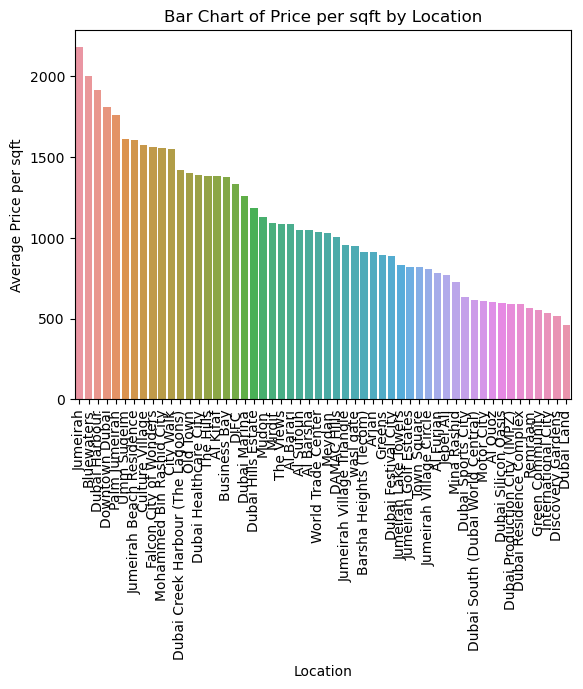

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

average_prices = df.groupby('neighborhood')['price_per_sqft'].mean().reset_index()

# Sort the DataFrame by average price in desc order
sorted_df = average_prices.sort_values(by='price_per_sqft', ascending=False)

# Create a bar chart
sns.barplot(x='neighborhood', y='price_per_sqft', data=sorted_df)
plt.xlabel('Location')
plt.ylabel('Average Price per sqft')
plt.title('Bar Chart of Price per sqft by Location')
plt.xticks(rotation=90)
plt.show()

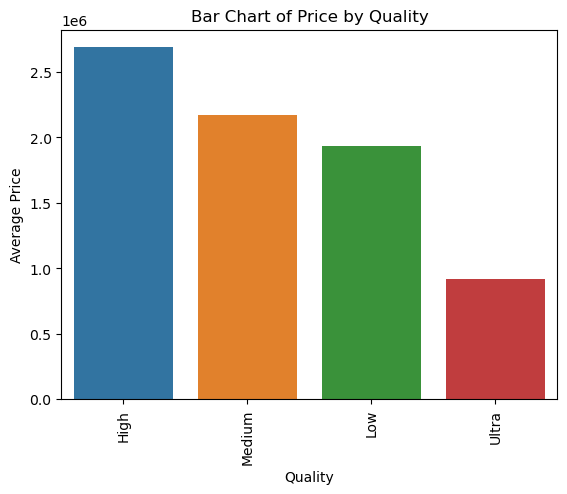

In [3]:
quality1 = df.groupby('quality')['price'].mean().reset_index()

# Sort the DataFrame by average price in desc order
sorted_df1 = quality1.sort_values(by='price', ascending=False)

# Create a bar chart
sns.barplot(x='quality', y='price', data=sorted_df1)
plt.xlabel('Quality')
plt.ylabel('Average Price')
plt.title('Bar Chart of Price by Quality')
plt.xticks(rotation=90)
plt.show()

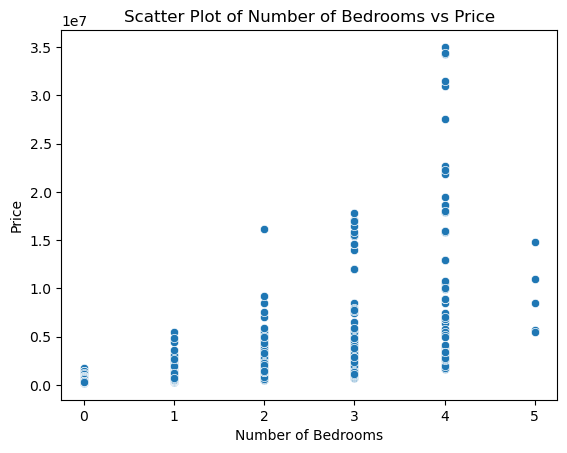

In [4]:
# Create scatter plot 
sns.scatterplot(data=df, x='no_of_bedrooms', y='price')
plt.title('Scatter Plot of Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

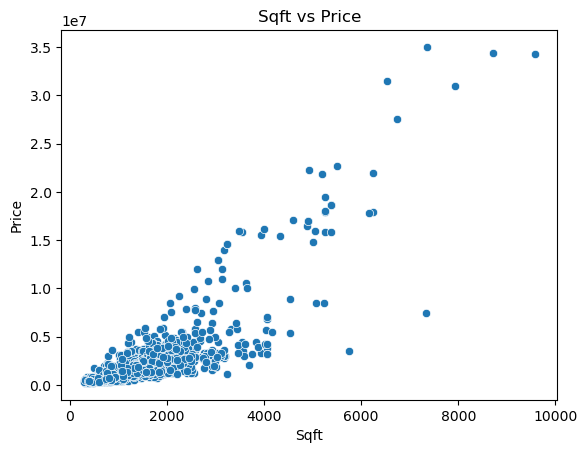

In [5]:
# Create scatter plot 
sns.scatterplot(data=df, x='size_in_sqft', y='price')
plt.title('Sqft vs Price')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show() 

In [6]:
df[1:2].values

array([[6008529, 'Palm Jumeirah', 25.106809, 55.151201, 2850000, 1582,
        1801.52, 2, 2, 'Medium', False, False, True, False, True, True,
        True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True, True, False, False,
        False, False, True, False]], dtype=object)

In [8]:
df.dtypes

id                       int64
neighborhood            object
latitude               float64
longitude              float64
price                    int64
size_in_sqft             int64
price_per_sqft         float64
no_of_bedrooms           int64
no_of_bathrooms          int64
quality                 object
maid_room                 bool
unfurnished               bool
balcony                   bool
barbecue_area             bool
built_in_wardrobes        bool
central_ac                bool
childrens_play_area       bool
childrens_pool            bool
concierge                 bool
covered_parking           bool
kitchen_appliances        bool
lobby_in_building         bool
maid_service              bool
networked                 bool
pets_allowed              bool
private_garden            bool
private_gym               bool
private_jacuzzi           bool
private_pool              bool
security                  bool
shared_gym                bool
shared_pool               bool
shared_s

In [9]:
columns_drop = ['id', 'latitude', 'longitude']
df = df.drop(columns=columns_drop, axis=1)
df.head(1)

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,Medium,False,False,True,...,False,False,True,False,False,False,False,False,True,False


## Correlation Map

In [14]:
# drop categorical values to quickly visualize the correlation heatmap
categorical_cols = ['neighborhood', 'quality']
df_numeric = df.drop(columns=categorical_cols, axis=1)
correlation_matrix = df_numeric.corr()

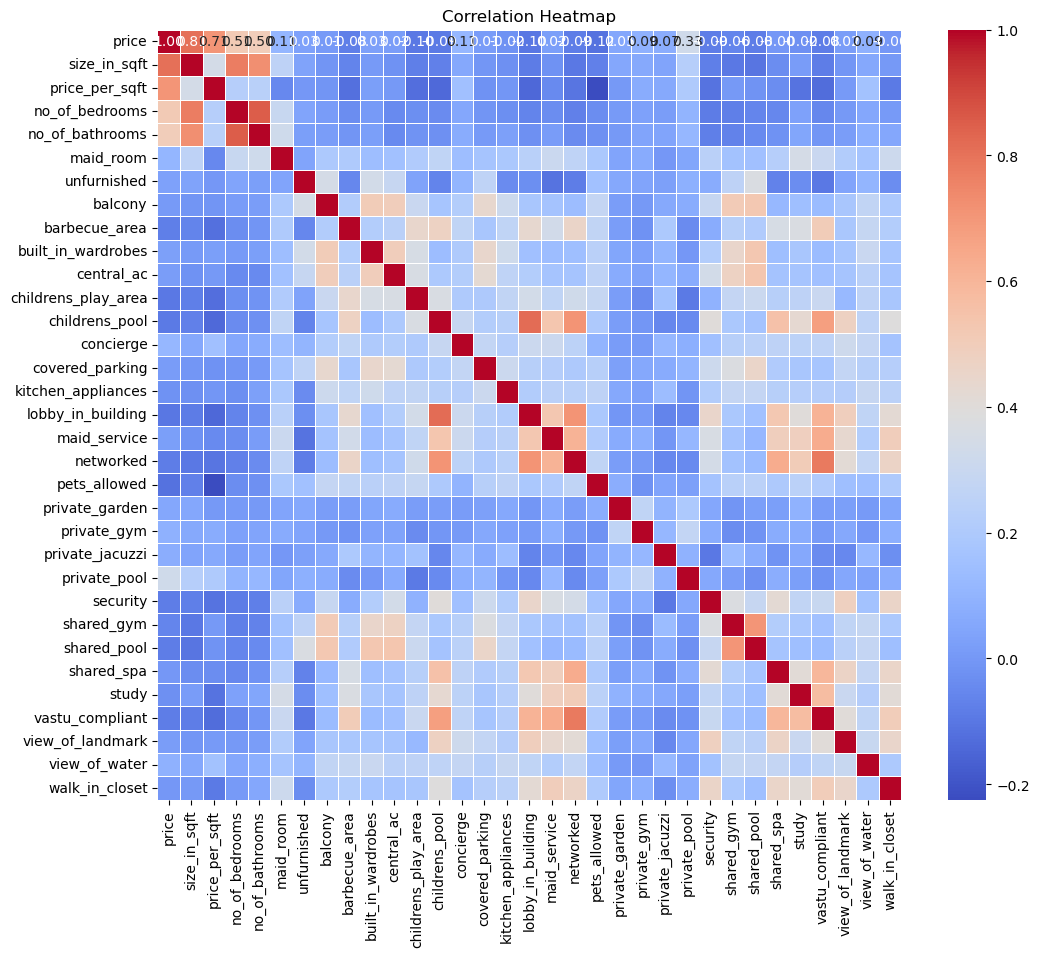

In [18]:
# Create correlation heatmap using seaborn

plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## Linear Regression Model

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Select features and target variable
X = df.drop(['price'], axis=1)  
y = df['price'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns for one-hot encoding
categorical_cols = ['neighborhood', 'quality']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f'LR Model - Mean Absolute Error: {mae}')
print(f'LR Model - Mean Squared Error: {mse}')
print(f'LR Model - Root Mean Squared Error: {rmse}')
print(f'LR Model - R-squared: {r2}')



LR Model - Mean Absolute Error: 565912.5851679099
LR Model - Mean Squared Error: 829848173170.0244
LR Model - Root Mean Squared Error: 910960.0283053173
LR Model - R-squared: 0.8977282168695561


## Try Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor model
random_forest_model = RandomForestRegressor()

# Create a new pipeline with preprocessing and the random forest model
new_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', random_forest_model)
])

# Train the random forest model
new_pipeline.fit(X_train, y_train)

# Make predictions on the test set using the random forest model
new_predictions = new_pipeline.predict(X_test)

# Evaluate the random forest model
new_mae = mean_absolute_error(y_test, new_predictions)
new_mse = mean_squared_error(y_test, new_predictions)
new_rmse = mean_squared_error(y_test, new_predictions, squared=False)
new_r2 = r2_score(y_test, new_predictions)

print(f'RF Model - Mean Absolute Error: {new_mae}')
print(f'RF Model - Mean Squared Error: {new_mse}')
print(f'RF Model - Root Mean Squared Error: {new_rmse}')
print(f'RF Model - R-squared: {new_r2}')


RF Model - Mean Absolute Error: 88149.23635170604
RF Model - Mean Squared Error: 136154946903.04274
RF Model - Root Mean Squared Error: 368991.7978804444
RF Model - R-squared: 0.9832200519902186
